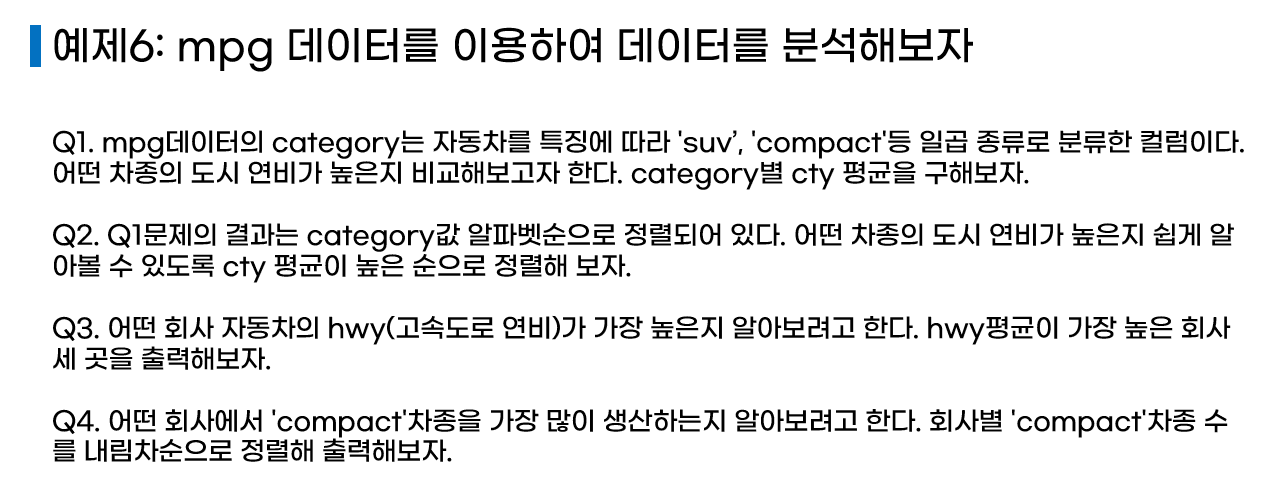

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1. mpg데이터의 category는 자동차를 특징에 따라 'suv','compact'등 일곱 종류로 분류한 컬럼이다. 어떤 차종의 도시 연비가 높은지 비교해보고자 한다. category별 cty 평균을 구해보자.
- hint) groupby()를 이용해 category별로 나눈 후 agg()를 이용해 cty 평균구하기

In [2]:
mpg = pd.read_csv('./data/mpg.csv')

In [3]:
np.unique(mpg['category'])

array(['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact',
       'suv'], dtype=object)

In [4]:
cty_mean = mpg.groupby('category').agg(cty_mean = ('cty','mean'))
cty_mean

,cty_mean
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


Q2. Q1문제의 결과는 category값 알파벳순으로 정렬되어 있다. 어떤 차종의 도시 연비가 높은지 쉽게 알아볼 수 있도록 cty 평균이 높은 순으로 정렬해 보자.
- hint) 1에서 만든 cty 평균기준으로 내림차순 정렬

In [5]:
cty_mean_sort = cty_mean.sort_values(by = 'cty_mean',ascending = False)
cty_mean_sort

,cty_mean
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


Q3. 어떤 회사 자동차의 hwy(고속도로 연비)가 가장 높은지 알아보려고 한다. hwy평균이 가장 높은 회사 세 곳을 출력해보자.
- hint) 2번과 같은 절차로 코드 구성후 일부만 출력하는 head()

In [6]:
hwy_mean = mpg.groupby('manufacturer').agg(hwy_mean =('hwy','mean'))
hwy_mean.sort_values('hwy_mean', ascending = False).head(3)

,hwy_mean
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


Q4. 어떤 회사에서 'compact'차종을 가장 많이 생산하는지 알아보려고 한다. 회사별 'compact'차종 수를 내림차순으로 정렬해 출력해보자.
- hint) query()를 이용 'compact' 차종만 남긴 후 회사별 자동차 수 구하기, 자동차 수는 데이터가 몇 행으로 구성되는지 빈도를 구하기

In [8]:
# 방법1
manufact_cpt_cnt = mpg.query('category == "compact"').groupby('manufacturer').agg(cpt_cnt = ('category','count'))
manufact_cpt_cnt.sort_values('cpt_cnt', ascending = False)

,cpt_cnt
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [9]:
# 방법2
mpg.query('category == "compact"')['manufacturer'].value_counts()

audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: manufacturer, dtype: int64

### 시각화 예제 : 경제활동인구 데이터 활용 분석 및 시각화

#### 데이터 불러오기 

In [10]:
economi = pd.read_csv('./data/시도_성별_경제활동인구_총괄_KOSIS_2022.csv', encoding = 'euc-kr')
economi.head()

,행정구역(시도),성별,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율(％),고용률(%),실업률(%)
0,서울특별시,남자,4007,2849,2760,89,1158,71.1,68.9,3.1
1,서울특별시,여자,4440,2418,2347,72,2022,54.5,NaN,3.0
2,부산광역시,남자,1406,973,946,27,433,69.2,67.3,2.7
3,부산광역시,여자,1528,768,745,23,760,50.3,48.8,3.0
4,대구광역시,남자,1001,708,691,17,294,70.6,69.0,2.3


#### 데이터 확인

In [11]:
# 데이터 정보 확인
economi.info()

# null값 확인
economi.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정구역(시도)      34 non-null     object 
 1   성별            34 non-null     object 
 2   15세이상인구 (천명)  34 non-null     int64  
 3   경제활동인구 (천명)   34 non-null     int64  
 4   취업자 (천명)      34 non-null     int64  
 5   실업자 (천명)      34 non-null     int64  
 6   비경제활동인구 (천명)  34 non-null     int64  
 7   경제활동참가율(％)    34 non-null     float64
 8   고용률(%)        24 non-null     float64
 9   실업률(%)        28 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 2.8+ KB


행정구역(시도)         0
성별               0
15세이상인구 (천명)     0
경제활동인구 (천명)      0
취업자 (천명)         0
실업자 (천명)         0
비경제활동인구 (천명)     0
경제활동참가율(％)       0
고용률(%)          10
실업률(%)           6
dtype: int64

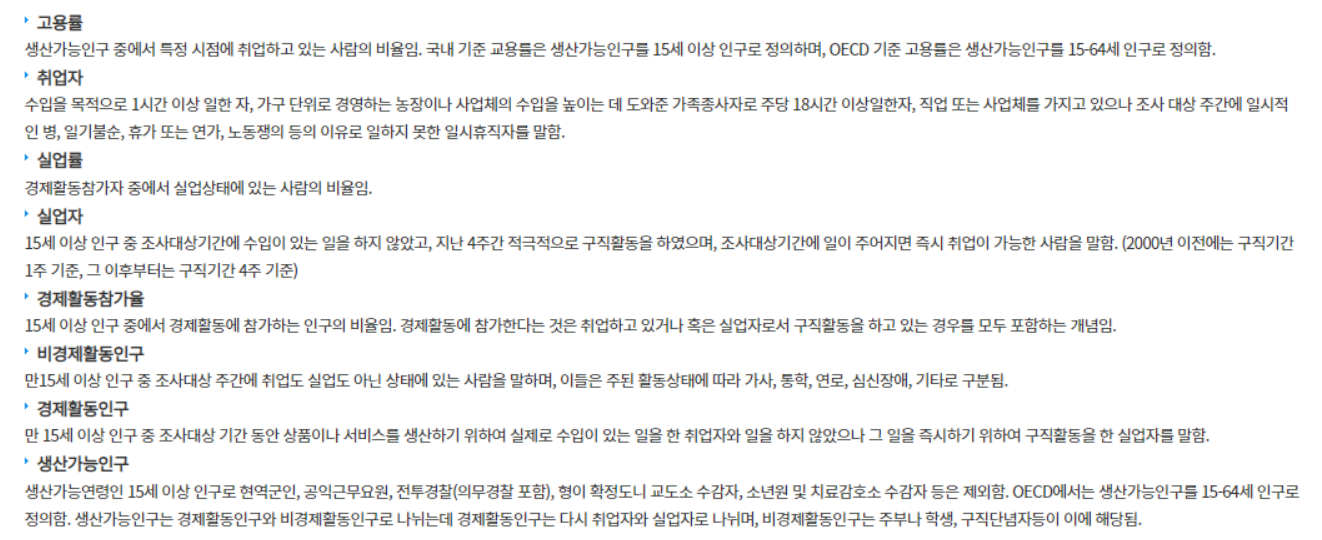

#### 데이터 전처리 - 고용률(%)과 실업률(%) 

- 특성공학-> 기존의 컬럼을 활용하여 데이터를 생성
- 고용률 = 취업자/15세이상인구
- 실업률 = 실업자/경제활동인구

In [12]:
# 고용률
economi['고용률(%)'].head()

0    68.9
1     NaN
2    67.3
3    48.8
4    69.0
Name: 고용률(%), dtype: float64

In [15]:
# 고용률 = 취업자/15세이상인구 
emp_pt =  economi['취업자 (천명)']/economi['15세이상인구 (천명)']
emp_pt = round(emp_pt,3)*100
economi['고용률(%)'] = emp_pt
economi['고용률(%)'].head()

0    68.9
1    52.9
2    67.3
3    48.8
4    69.0
Name: 고용률(%), dtype: float64

In [14]:
# 실업률
economi['실업률(%)'].tail()

29    2.1
30    2.6
31    NaN
32    2.3
33    1.0
Name: 실업률(%), dtype: float64

In [16]:
# 실업률 = 실업자/경제활동인구
unemp_pt =  economi['실업자 (천명)']/economi['경제활동인구 (천명)']
unemp_pt = round(unemp_pt,3)*100
unemp_pt
economi['실업률(%)'] = unemp_pt

In [17]:
economi['실업률(%)'].tail()

29    2.1
30    2.6
31    2.6
32    2.2
33    1.0
Name: 실업률(%), dtype: float64

In [20]:
# 한글 출력해주기 위해서 지정
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

#### 시도별 고용률 평균을 구하고 시각화하여 가장 높은 지역이 어디인지 확인해보자

In [21]:
# 1. 시도별로 고용률의 평균을 확인, 
# 2. 그래프로 시각화 한 후 가장 높은 지역이 어디인지 확인

state_emp = economi[['행정구역(시도)','고용률(%)']].groupby('행정구역(시도)', as_index = False).mean()
state_emp.head()

,행정구역(시도),고용률(%)
0,강원도,63.95
1,경기도,64.25
2,경상남도,61.40
3,경상북도,64.10
4,광주광역시,59.80


In [24]:
# 수직 : Vertical   수평 : Horizontal

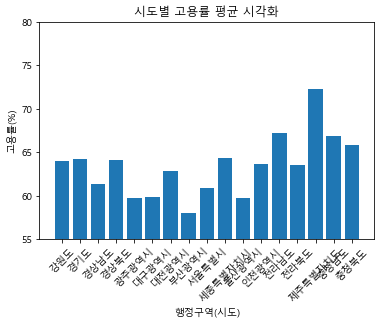

In [25]:
# 1. 수직 막대그래프 : bar 함수
plt.figure(figsize =(6,4))
plt.bar(state_emp['행정구역(시도)'],state_emp['고용률(%)'])   
plt.xticks(rotation = 45)  # x축 명칭 표시
plt.title('시도별 고용률 평균 시각화')
plt.xlabel('행정구역(시도)')
plt.ylabel('고용률(%)')

# 2. 막대 크기가 비슷해서 잘 확인이 안되니, ylim 크기 조절해서 확인
plt.ylim(55,80)
plt.show()

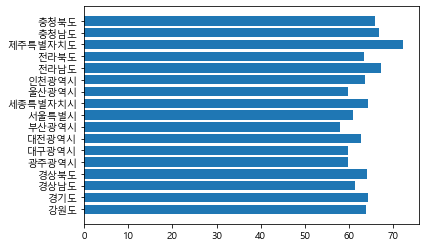

In [26]:
# 수평 막대 그래프 : barh 함수
plt.figure(figsize =(6,4))
plt.barh(state_emp['행정구역(시도)'],state_emp['고용률(%)'])   
plt.show()

#### 시도별 남자의 실업률이 가장 높은 곳 알아보기

In [27]:
economi['성별'][0]

'남자'

In [28]:
man = economi.query("성별 == '남자'")
man_unemp = man[['행정구역(시도)','실업률(%)']]
man_unemp.head()

,행정구역(시도),실업률(%)
0,서울특별시,3.1
2,부산광역시,2.8
4,대구광역시,2.4
6,인천광역시,2.8
8,광주광역시,2.3


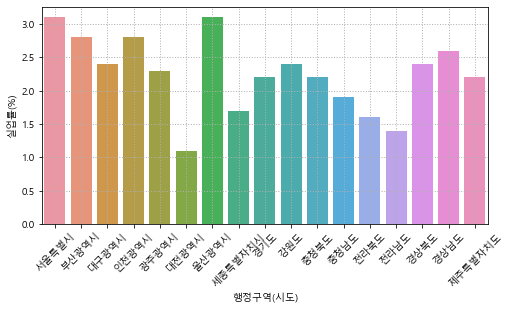

In [29]:
plt.figure(figsize = (8,4))

sns.barplot(x = man_unemp['행정구역(시도)'],y = man_unemp['실업률(%)'])
plt.grid(ls=':', lw = 1)
plt.xticks(rotation=45)
plt.show()